https://towardsdatascience.com/customize-your-jupyter-notebook-theme-in-2-lines-of-code-fc726cea1513 ##To change the theme

#### After skimming through the dataset of the telecom churn, we have a basic idea of the data which has around 3k samples with 21 attributes - 20 attributes as the features and 'churn' as the target variable. Customer churn refers to the situation of the customer leaving the current telecom provider/customer switching to rival telecom provider for the telecom services.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv(r'telecom_churn.csv')

In [3]:
df.head(3)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False


In [4]:
df.shape

(3333, 21)

## EDA and Data cleaning

In [4]:
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

#### Hence we see that there are no null values in the dataset. We can directly check it by the following ways:-

In [5]:
print(f'We can directly use any method which gives us {df.isnull().sum().any()}, \
hence there are no null values. To check the duplicate we have {df.duplicated().any()}, hence no duplicates as well in the \
dataset.')

We can directly use any method which gives us False, hence there are no null values. To check the duplicate we have False, hence no duplicates as well in the dataset.


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

#### Checking the categorical variables

In [211]:
d1 = df.select_dtypes(exclude = 'object')
d2 = df.select_dtypes(include = 'object')

In [8]:
print(f'The columns in the dataframe with numerical data types are :- {d1.columns.tolist()}. \n\nTotal number = {len(d1.columns.tolist())}')
print('\n')
print(f'The columns which are the categorical variables are :- {d2.columns.tolist()}. \n\nTotal number = {len(d2.columns.tolist())}')

The columns in the dataframe with numerical data types are :- ['account length', 'area code', 'number vmail messages', 'total day minutes', 'total day calls', 'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls', 'churn']. 

Total number = 17


The columns which are the categorical variables are :- ['state', 'phone number', 'international plan', 'voice mail plan']. 

Total number = 4


### Now we are gonna remove the phone number column as it is comprises completely unique values(that is 3333 unique entries) which might not help us in the predictions.


In [9]:
##We converted the columns for d1 and d2 from dataframes to lists. We remove phone numbers as it is of string type.
non_categorical=d1.columns.tolist()
categorical=d2.columns.tolist()

In [10]:
categorical.remove('phone number')

In [11]:
##We create a copy of the original dataframe for data wrangling so that we have something to bank upon if needed.
df1 = df.copy()

### Encoding the categorical features
##### Note that State column has 51 unique values so we are gonna treat them as string catefgoricals only. We are gonna change the other two.

In [12]:
df1['international plan'].replace(['no','yes'], [0,1],inplace=True)
df1['voice mail plan'].replace(['no','yes'], [0,1],inplace=True)

In [13]:
##We could have done that using a loop only
for i in categorical[1:]:
    print(df1[str(i)].replace([0,1],['no','yes']))
    print('\n\n\n\n\n\n') #--for some spacing

0        no
1        no
2        no
3       yes
4       yes
       ... 
3328     no
3329     no
3330     no
3331    yes
3332     no
Name: international plan, Length: 3333, dtype: object







0       yes
1       yes
2        no
3        no
4        no
       ... 
3328    yes
3329     no
3330     no
3331     no
3332    yes
Name: voice mail plan, Length: 3333, dtype: object









In [14]:
df1[categorical].head(3)
##Hence we see that that we have changed the variables

,state,international plan,voice mail plan
0,KS,0,1
1,OH,0,1
2,NJ,0,0


### Now we look into the proportion of churn against the proportion of non-churn

In [15]:
a = round((df1.churn.value_counts(normalize=True)[True])*100,2)
b = round((df1.churn.value_counts(normalize=True)[False])*100,2)

<AxesSubplot:title={'center':'Porportion of churn vs Non-churn'}, xlabel='CATEGORIES', ylabel='PROPORTION'>

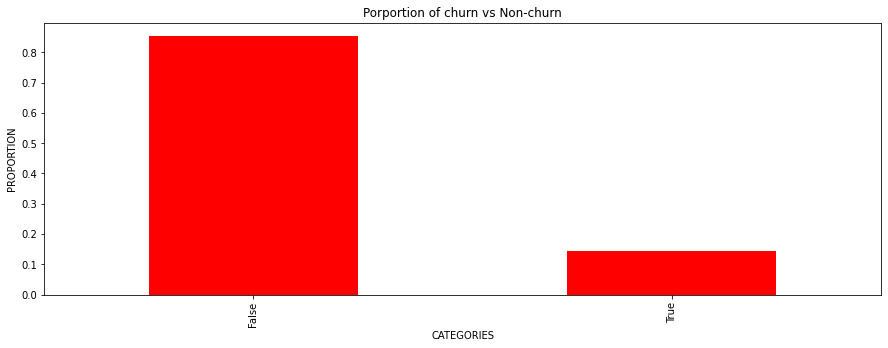

In [16]:
df1.churn.value_counts(normalize=True).plot(kind='bar', figsize=(15,5), title = 'Porportion of churn vs Non-churn', color='r',xlabel='CATEGORIES',ylabel='PROPORTION')

In [17]:
print(f'Proportion of customers who churned: {round((df1.churn.value_counts(normalize=True)[True])*100,2)}%')
print(f'Proportion of customers who did not churn: {round((df1.churn.value_counts(normalize=True)[False])*100,2)}%')

Proportion of customers who churned: 14.49%
Proportion of customers who did not churn: 85.51%


## We observe the State wise churn 

In [31]:
d = dict()
for i in df1['state'].unique():
    d[i]=round(df1[df1["state"]==i]["churn"].mean()*100,0)

In [32]:
[(k,v) for k,v in d.items() if v == max(list(d.values()))]

[('NJ', 26.0), ('CA', 26.0)]

In [33]:
[(k,v) for k,v in d.items() if v == min(list(d.values()))]

[('VA', 6.0), ('AZ', 6.0), ('HI', 6.0), ('AK', 6.0)]

### Hence we conclude that the following:

#### 1. New Jersey and California topped the lists of states having the highest rate of churning equivalent to 26%.
#### 2. Similarly -  Virginia, Arizona, Hawaii & Alaska were the states with the lowest chruning rate in the US, equivalent to 6% 

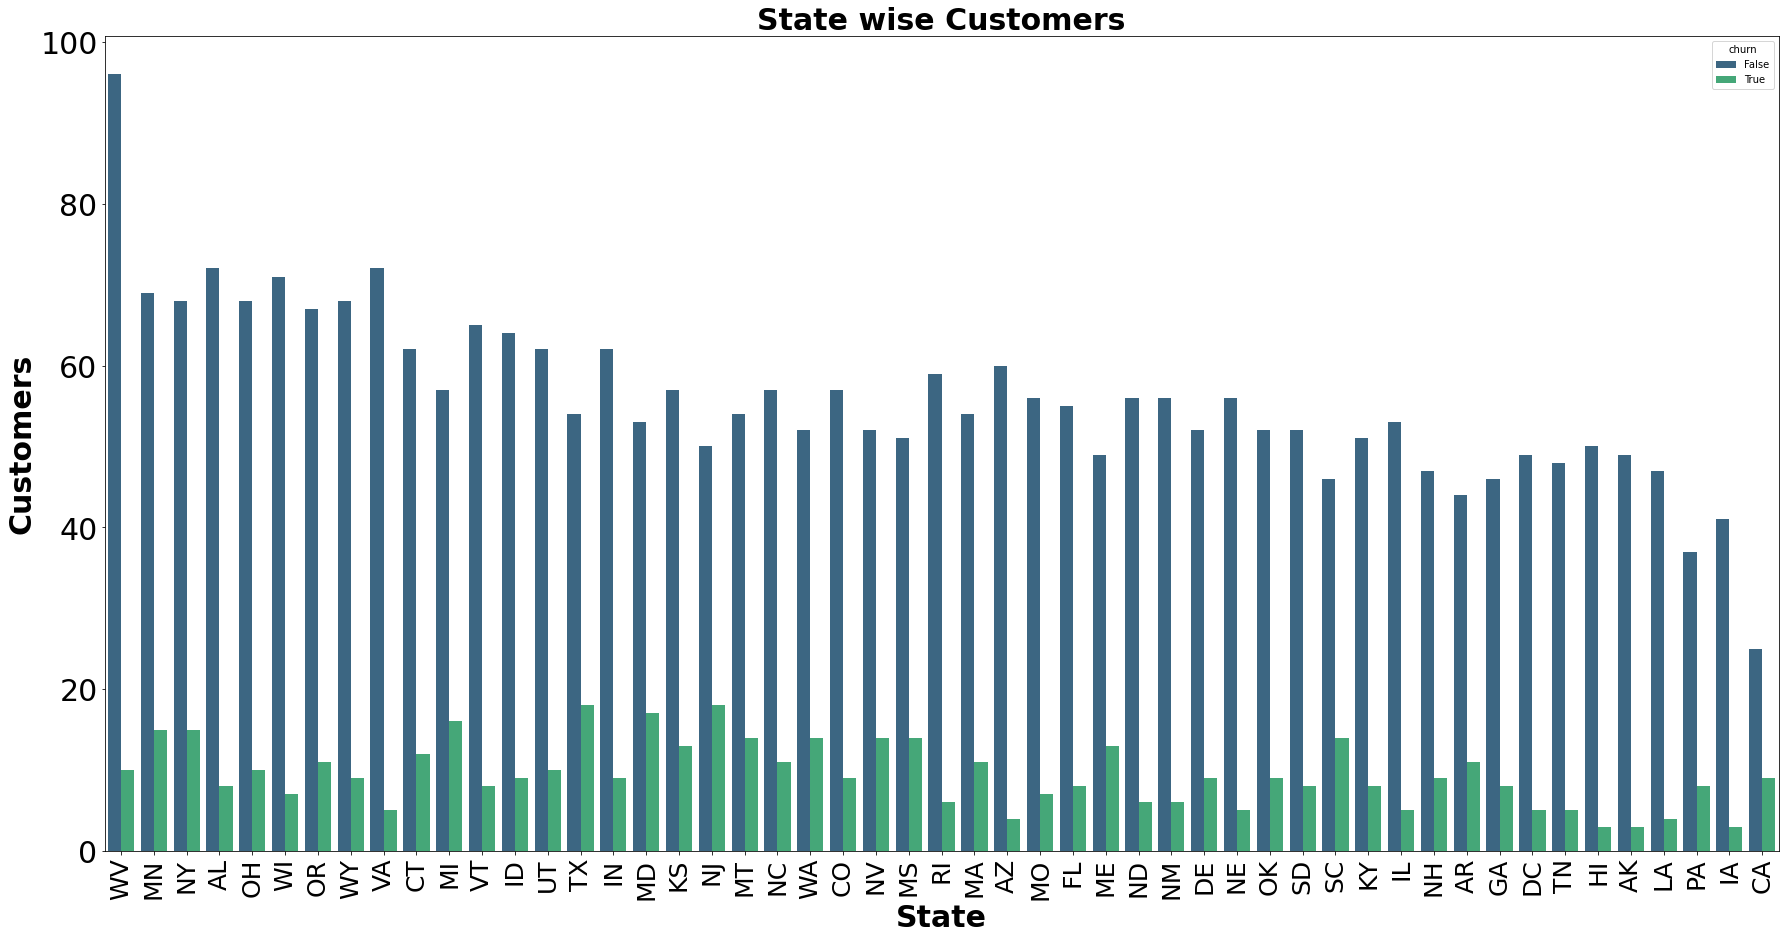

In [77]:
# bars = list(d.keys())
# values = list(d.values())
# plt.bar(bars,values)
fig, ax=plt.subplots(figsize=(30,15))
sns.countplot(data = df1, x='state', order=df1['state'].value_counts().index, palette='viridis', hue='churn')
plt.xlabel('State', fontsize=30, fontweight='bold')
plt.ylabel('Customers', fontsize=30, fontweight='bold')
plt.title('State wise Customers', fontsize=30, fontweight='bold')
plt.xticks(fontsize=25,rotation=90)
plt.yticks(fontsize=30)
plt.show()

### Now we have the Account length which tells us the number of months the customer has been availing the services for. We create a new column with the services availed in years and then visualize the number of years churned customers availed the servcies for.

In [79]:
df1['servicesAvailed_years'] = round((df1['account length']/12),0)

In [96]:
yrs_churn = df1.loc[df1['churn'] == True]
yrs_nonChurn = df1.loc[df1['churn'] == False]

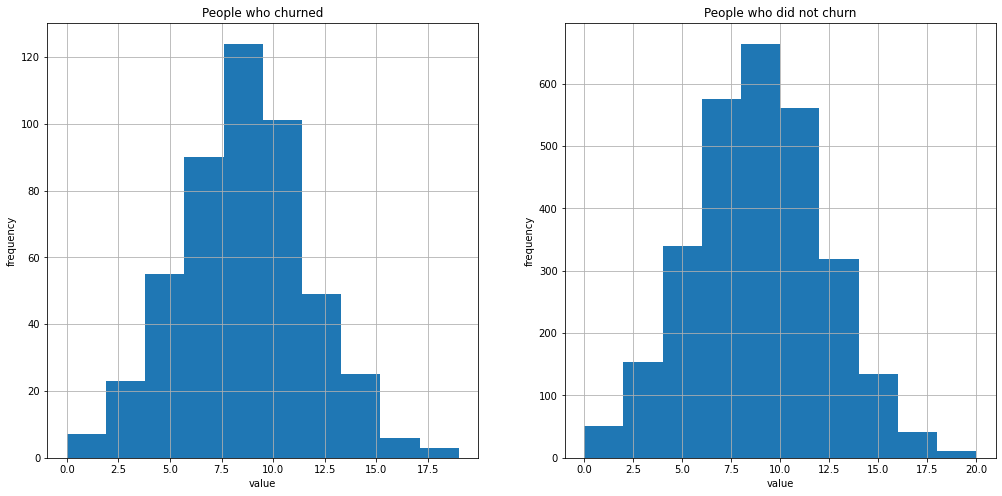

In [107]:
fig, (ax_churned,ax_nonChruned) = plt.subplots(1,2,figsize=(17,8))

yrs_churn['servicesAvailed_years'].hist(ax = ax_churned)
yrs_nonChurn['servicesAvailed_years'].hist(ax = ax_nonChruned)

ax_churned.set(title = 'People who churned', ylabel='frequency', xlabel='value')
ax_nonChruned.set(title = 'People who did not churn', ylabel='frequency', xlabel='value')
plt.show()

### Hence we conclude that customers have churned the most after completing 7-10 years(As per plot 1)

## Now we observe if there were any customers making international calls without any international plan or customers making voice emails without any corresponding plan

In [113]:
print(df1[df1['total intl calls']>0]['international plan'].unique())
print(df1[df1['number vmail messages']>0]['voice mail plan'].unique())
##Here 0 denotes False while 1 denotes True as these features were encoded earlier.

[0 1]
[1]


#### Hence we see that there were no customers who made voice emails without the designated plan devised by the telecom provider, however, there were some customers who made International calls without the correspondong international plan.

##### Let's see the proportion of those customers.

In [141]:
print(str(round((len(df1.loc[(df1['total intl calls']>0) & (df1['international plan']==0)]['total intl calls']))/len(df1['total intl calls'])*100,2)) + '%')

89.77%


### Hence around 90% of the customers did not have the international plan but made international calls. Let us look at the number of international calls of the samples in the dataset.

<AxesSubplot:ylabel='Frequency'>

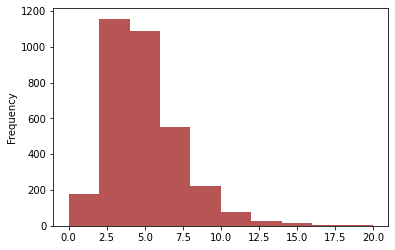

In [154]:
df1['total intl calls'].plot(kind='hist', alpha=0.8, color = 'brown')

### We see that people have just made 2-6 calls at the most which explains the low number of customers opting for the international plans due to less usage of the same.

### Now We look into the customer service calls made and the churning rate. We use the saved copy of the df1 for this purpose.

In [176]:
p = pd.DataFrame(np.random.randint(3,7,(60,2)), columns = list('ab'))
p.skew()

a   -0.172973
b    0.269565
dtype: float64

array([[<AxesSubplot:title={'center':'a'}>,
        <AxesSubplot:title={'center':'b'}>]], dtype=object)

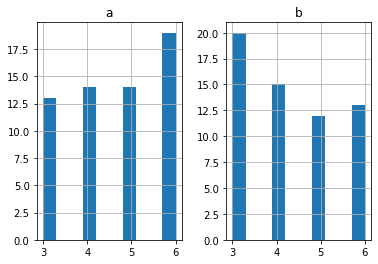

In [177]:
p.hist()

## Creation of new variables

### We first find the correlation between different features in order to check for the Multicollinearity. Multicollinearity refers to two or more features being highly correlated with one another in a model. Multicollinearity can be a problem in a regression model because we would not be able to distinguish between the individual effects of the independent variables on the dependent variable.

#### We remove the column churn as that is our TARGET variable.

In [180]:
df2 = df1.drop({'churn'}, axis=1)

In [181]:
df2.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'servicesAvailed_years'],
      dtype='object')

<AxesSubplot:>

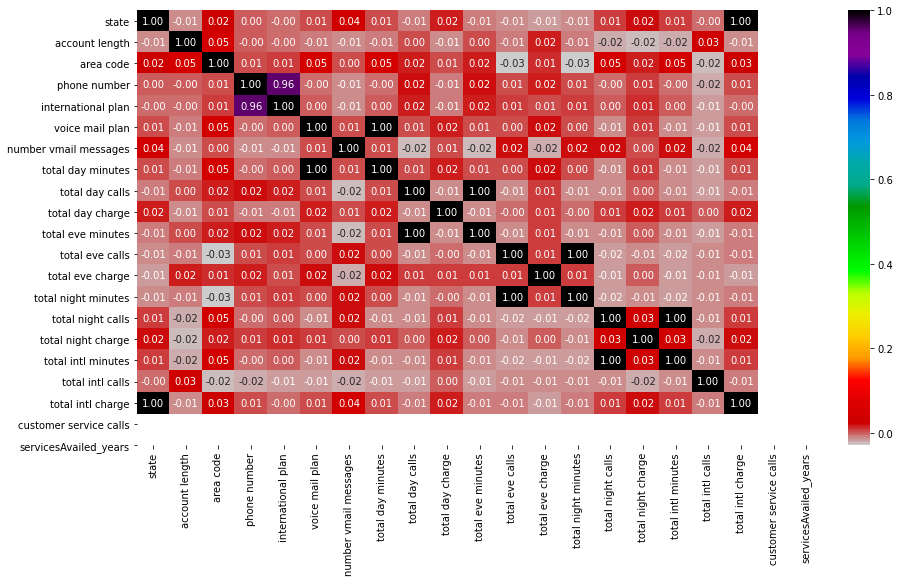

In [293]:
from matplotlib.pyplot import figure
figure(figsize=(15,8))
sns.heatmap(df2.corr(), xticklabels=df2.columns.values, yticklabels=df2.columns.values, 
            annot=True, cmap="nipy_spectral_r",annot_kws={'size': 10},fmt=".2f")

#### We see that Phone number is highly perfectly correlated with the state. Also, phone numbers are unique and would not provide much in the predictions if an ML model is deployed hence it is better if we delete the whole column(my understanding).

#### Hence we delete the phone number column from the df1 that we have been working on.

In [197]:
df1.drop({'phone number'},axis=1,inplace=True)

In [213]:
d1.drop({'churn'}, axis=1, inplace=True)

c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\pandas\core\frame.py:4162: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


### Moreover, we observe that the call charges have correlation with some of the other features like the calls and minutes spend(day, evening, night) etc. So we calculate the rate calls and delete these charges' columns from the data set. This step is to tackle the multicollinearity that might prove to be helpful.

In [294]:
df1['day_rate'] = df1['total day charge']/df1['total day minutes']
df1['eve_rate'] = df1['total eve charge']/df1['total eve minutes']
df1['night_rate'] = df1['total night charge']/df1['total night minutes']

In [296]:
df1.drop({'total day charge','total eve charge','total night charge'}, axis=1,inplace=True)

In [297]:
df1.columns

Index(['state', 'account length', 'area code', 'international plan',
       'voice mail plan', 'number vmail messages', 'total day minutes',
       'total day calls', 'total eve minutes', 'total eve calls',
       'total night minutes', 'total night calls', 'total intl minutes',
       'total intl calls', 'total intl charge', 'customer service calls',
       'churn', 'servicesAvailed_years', 'day_rate', 'eve_rate', 'night_rate'],
      dtype='object')

In [236]:
d1_skew = d1.skew()

### We have the skewness of all the numeric columns. We set a threshold and the columns violating the thresholds would be transformed into a log of its values to curb the skewness. This is known as the log transform of the data.

In [237]:
d1_skew

account length            0.096606
area code                 1.126823
number vmail messages     1.264824
total day minutes        -0.029077
total day calls          -0.111787
total day charge         -0.029083
total eve minutes        -0.023877
total eve calls          -0.055563
total eve charge         -0.023858
total night minutes       0.008921
total night calls         0.032500
total night charge        0.008886
total intl minutes       -0.245136
total intl calls          1.321478
total intl charge        -0.245287
customer service calls    1.091359
dtype: float64

In [238]:
d1_skew = d1_skew.to_frame(name = 'values')

In [239]:
skew_thresh = 0.75 ##We set the threshold here used for the log transform
d1_skew.head(3)

,values
account length,0.096606
area code,1.126823
number vmail messages,1.264824


In [240]:
d1_skew['values'] = np.round(d1_skew.values, decimals=3) #--we change the decimal places

In [242]:
d1_skew.head(3)

,values
account length,0.097
area code,1.127
number vmail messages,1.265


In [263]:
d1_skew_updated =d1_skew[d1_skew['values']>skew_thresh]

In [267]:
d1_skew_updated.drop({'area code'}, axis=0,inplace=True) #--We delete the area code column and change it to string type

c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\pandas\core\frame.py:4162: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [271]:
df1['area code'] = df1['area code'].astype('str')

In [268]:
d1_skew_updated

,values
number vmail messages,1.265
total intl calls,1.321
customer service calls,1.091


### Applying the log transform

#### Let us see on ''total intl calls''-the effect of converting the values to their log values in order to lower the skewness. After plotting the values we observe that the logarithm values are less skewed and nearly normal. This helps a great deal when using these features in any ML models.

<AxesSubplot:>

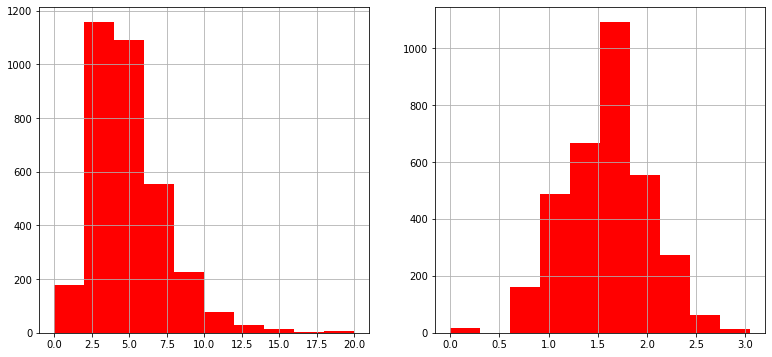

In [278]:
fig, (ax_before,ax_after) = plt.subplots(1,2,figsize = (13,6))

df1['total intl calls'].hist(ax = ax_before, color='r') 

df1['total intl calls'].apply(lambda x: np.log1p(x)).hist(ax = ax_after, color = 'r')

In [279]:
##We apply the log transform on the columns.
skew_final_list = list(d1_skew_updated.T.columns)
skew_final_list

['number vmail messages', 'total intl calls', 'customer service calls']

In [283]:
for c in skew_final_list:
    df1[c] = df1[c].apply(lambda x: np.log1p(x))

In [287]:
df1[skew_final_list].head() ##--Hence the values have been changed tro their logarithmic values.

,number vmail messages,total intl calls,customer service calls
0,3.258097,1.386294,0.693147
1,3.295837,1.386294,0.693147
2,0.000000,1.791759,0.000000
3,0.000000,2.079442,1.098612
4,0.000000,1.386294,1.386294


### Now We look into the customer service calls made and the churning rate. We use the saved copy of the df1 for this purpose ie df

In [314]:
df[df['churn']==True]['customer service calls'].count()

483

In [315]:
df[df['churn']==False]['customer service calls'].count()

2850

In [345]:
z = df.groupby('churn').agg({'customer service calls' : 'sum'})
print(f'The proportion of calls made by people of churned are : {(int(z.values[1])/df["customer service calls"].sum())*100} %')

The proportion of calls made by people of churned are : 20.675753503551544 %


### Hence we observe that only 21% of the customer service calls were from those who ultimately churned which indicates that the calls might have been made for various other purposes apart from redressals.

### We make a more detailed analysis below.

In [351]:
a = df.groupby(['area code', 'churn']).agg({'customer service calls' : 'sum', 'state': 'count'}).reset_index()
a.rename(columns = {'state': 'Number of customers'})
# a['Average calls'] = a['customer service calls']/a['Number of customers']

,area code,churn,customer service calls,Number of customers
0,408,False,1005,716
1,408,True,268,122
2,415,False,2039,1419
3,415,True,533,236
4,510,False,1088,715
5,510,True,276,125


In [354]:
a['Average calls'] = a['customer service calls']/a['state']

In [355]:
a

,area code,churn,customer service calls,state,Average calls
0,408,False,1005,716,1.403631
1,408,True,268,122,2.196721
2,415,False,2039,1419,1.436927
3,415,True,533,236,2.258475
4,510,False,1088,715,1.521678
5,510,True,276,125,2.208000


### We conclude that area 415 had the highest number of churns with the average calls being close to 2